In [23]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [24]:
num_threads = 6

benchmark_base         = pd.read_csv("benchmark_base.csv")
benchmark_1            = pd.read_csv("benchmark_1.csv")
benchmark_2            = pd.read_csv("benchmark_2.csv")
benchmark_3            = pd.read_csv("benchmark_3.csv")
benchmark_schtrassen_2 = pd.read_csv("benchmark_schtrassen_2.csv")
benchmark_schtrassen_3 = pd.read_csv("benchmark_schtrassen_3.csv")
benchmark_schtrassen_4 = pd.read_csv("benchmark_schtrassen_4.csv")


In [25]:
benchmark = pd.concat([
    # benchmark_base,
    # benchmark_1,
    benchmark_2,
    benchmark_3,
    benchmark_schtrassen_2,
    benchmark_schtrassen_3,
    benchmark_schtrassen_4], ignore_index=True)

num_lines = len(benchmark["name"]);
num_tests = int(num_lines / num_threads)


     x          y                         Name  size
0    1   1.000037              Benchmark_2/256   256
1    2   1.971204              Benchmark_2/256   256
2    3   2.476852              Benchmark_2/256   256
3    4   3.838578              Benchmark_2/256   256
4    5   3.848154              Benchmark_2/256   256
..  ..        ...                          ...   ...
145  2  14.530263  Benchmark_Schtrassen_4/4096  4096
146  3  18.780982  Benchmark_Schtrassen_4/4096  4096
147  4  24.638684  Benchmark_Schtrassen_4/4096  4096
148  5  24.880964  Benchmark_Schtrassen_4/4096  4096
149  6  24.784270  Benchmark_Schtrassen_4/4096  4096

[150 rows x 4 columns]


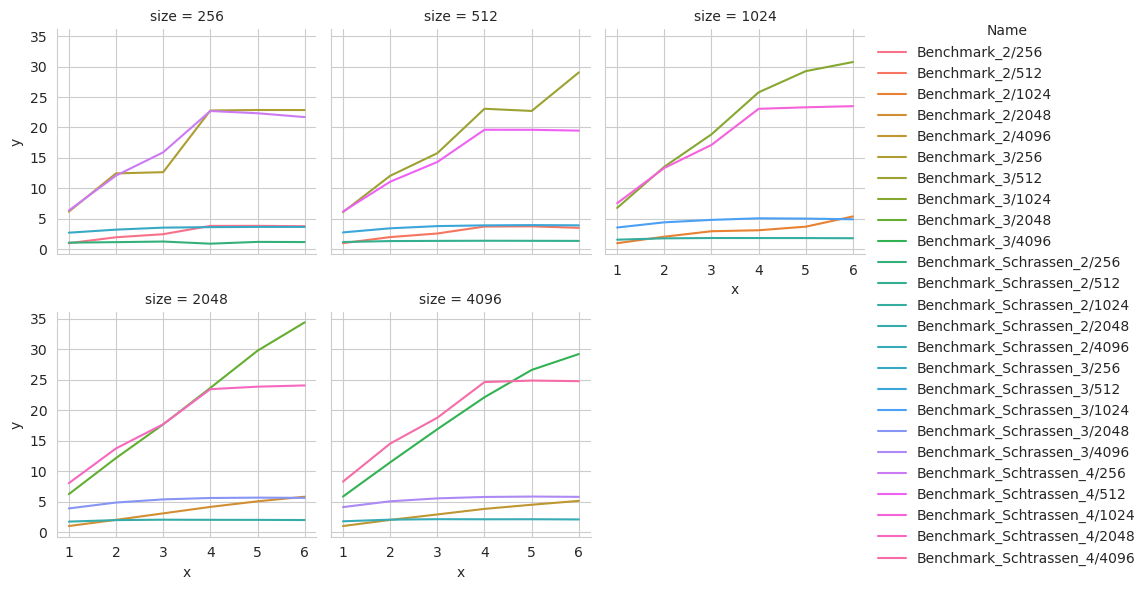

In [26]:
titles = []

x = []
y = []
hue = []
size = []

for i in range(num_tests):

    name = benchmark["name"][i * num_threads].split("/")

    titles.append(name[0] + '/' + name[2])

    y_max = benchmark["real_time"][i * num_threads + 0]

    for j in range(num_threads):
        y.append(benchmark["real_time"][(i * num_threads + j) + 0])

        hue.append(titles[-1])
        size.append(name[2])

        # if (int(size[-1]) == 256):
        #     y[-1] = 122.919 / y[-1]

        # if (int(size[-1]) == 512):
        #     y[-1] = 1085.76 / y[-1]

        # if (int(size[-1]) == 1024):
        #     y[-1] = 11298.8 / y[-1]

        # if (int(size[-1]) == 2048):
        #     y[-1] = 244902 / y[-1]

        # if (int(size[-1]) == 4096):
        #     y[-1] = 2094360 / y[-1]

        if (int(size[-1]) == 256):
            y[-1] = 84.076 / y[-1]

        if (int(size[-1]) == 512):
            y[-1] = 659.76 / y[-1]

        if (int(size[-1]) == 1024):
            y[-1] = 6137.8 / y[-1]

        if (int(size[-1]) == 2048):
            y[-1] = 47152 / y[-1]

        if (int(size[-1]) == 4096):
            y[-1] = 343106 / y[-1]

        x.append(j + 1)

data = list(zip(x, y, hue, size))
dataFrame = pd.DataFrame(data, columns=["x", "y", "Name", "size"])

print(dataFrame)


sns.set_style("whitegrid")
g = sns.FacetGrid(data=dataFrame, col="size", col_wrap=3, hue="Name")
g.map(sns.lineplot, "x", "y")
g.add_legend()



     x         y                         Name  size
0    1  1.000037              Benchmark_2/256   256
1    2  0.985602              Benchmark_2/256   256
2    3  0.825617              Benchmark_2/256   256
3    4  0.959645              Benchmark_2/256   256
4    5  0.769631              Benchmark_2/256   256
..  ..       ...                          ...   ...
145  2  7.265131  Benchmark_Schtrassen_4/4096  4096
146  3  6.260327  Benchmark_Schtrassen_4/4096  4096
147  4  6.159671  Benchmark_Schtrassen_4/4096  4096
148  5  4.976193  Benchmark_Schtrassen_4/4096  4096
149  6  4.130712  Benchmark_Schtrassen_4/4096  4096

[150 rows x 4 columns]


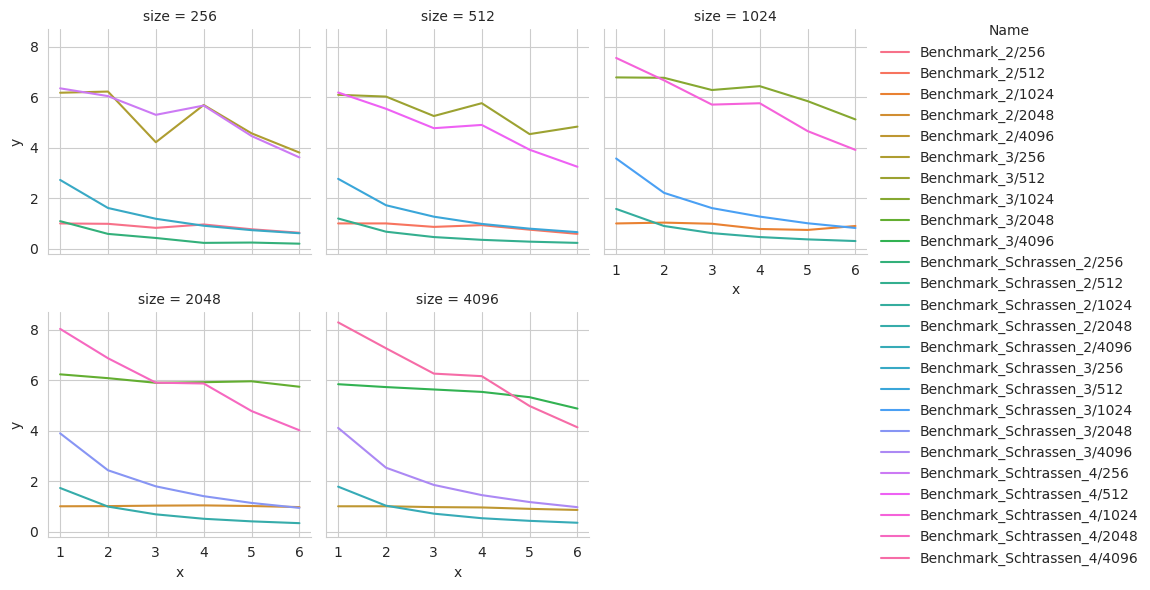

In [27]:
titles = []

x = []
y = []
hue = []
size = []

for i in range(num_tests):

    name = benchmark["name"][i * num_threads].split("/")

    titles.append(name[0] + '/' + name[2])

    y_max = benchmark["real_time"][i * num_threads + 0]

    for j in range(num_threads):
        y.append(benchmark["real_time"][(i * num_threads + j) + 0])

        hue.append(titles[-1])
        size.append(name[2])

        # if (int(size[-1]) == 256):
        #     y[-1] = 122.919 / y[-1] / (j + 1)

        # if (int(size[-1]) == 512):
        #     y[-1] = 1085.76 / y[-1] / (j + 1)

        # if (int(size[-1]) == 1024):
        #     y[-1] = 11298.8 / y[-1] / (j + 1)

        # if (int(size[-1]) == 2048):
        #     y[-1] = 244902 / y[-1] / (j + 1)

        # if (int(size[-1]) == 4096):
        #     y[-1] = 2094360 / y[-1] / (j + 1)

        if (int(size[-1]) == 256):
            y[-1] = 84.076 / y[-1] / (j + 1)

        if (int(size[-1]) == 512):
            y[-1] = 659.76 / y[-1] / (j + 1)

        if (int(size[-1]) == 1024):
            y[-1] = 6137.8 / y[-1] / (j + 1)

        if (int(size[-1]) == 2048):
            y[-1] = 47152 / y[-1] / (j + 1)

        if (int(size[-1]) == 4096):
            y[-1] = 343106 / y[-1] / (j + 1)


        x.append(j + 1)

data = list(zip(x, y, hue, size))
dataFrame = pd.DataFrame(data, columns=["x", "y", "Name", "size"])

print(dataFrame)


sns.set_style("whitegrid")
g = sns.FacetGrid(data=dataFrame, col="size", col_wrap=3, hue="Name")
g.map(sns.lineplot, "x", "y")
g.add_legend()


     x         y                         Name  size
0    0  1.000000              Benchmark_2/256   256
1    1  1.971132              Benchmark_2/256   256
2    2  2.476761              Benchmark_2/256   256
3    3  3.838437              Benchmark_2/256   256
4    4  3.848012              Benchmark_2/256   256
..  ..       ...                          ...   ...
145  1  1.752287  Benchmark_Schtrassen_4/4096  4096
146  2  2.264905  Benchmark_Schtrassen_4/4096  4096
147  3  2.971319  Benchmark_Schtrassen_4/4096  4096
148  4  3.000537  Benchmark_Schtrassen_4/4096  4096
149  5  2.988876  Benchmark_Schtrassen_4/4096  4096

[150 rows x 4 columns]


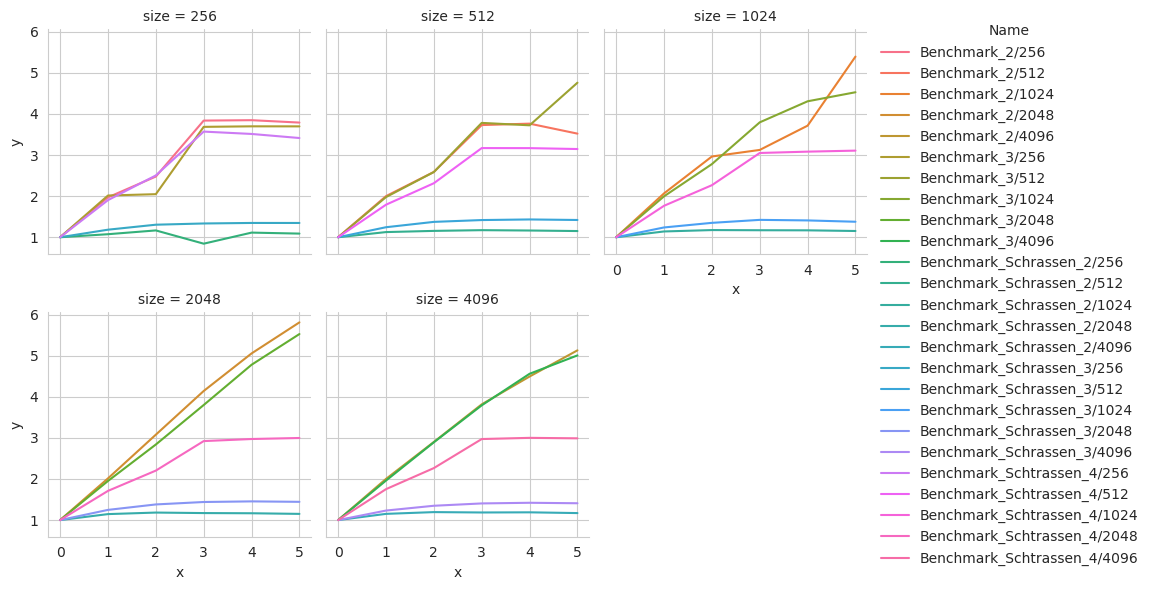

In [28]:
titles = []

x = []
y = []
hue = []
size = []

for i in range(num_tests):

    name = benchmark["name"][i * num_threads].split("/")

    titles.append(name[0] + '/' + name[2])

    y_max = benchmark["real_time"][i * num_threads + 0]

    for j in range(num_threads):
        y.append(benchmark["real_time"][(i * num_threads + j) + 0])

        hue.append(titles[-1])
        size.append(name[2])

        y[-1] = y_max / y[-1]

        x.append(j)

data = list(zip(x, y, hue, size))
dataFrame = pd.DataFrame(data, columns=["x", "y", "Name", "size"])

print(dataFrame)


sns.set_style("whitegrid")
g = sns.FacetGrid(data=dataFrame, col="size", col_wrap=3, hue="Name")
g.map(sns.lineplot, "x", "y")
g.add_legend()


     x         y                         Name  size
0    0  1.000000              Benchmark_2/256   256
1    1  0.985566              Benchmark_2/256   256
2    2  0.825587              Benchmark_2/256   256
3    3  0.959609              Benchmark_2/256   256
4    4  0.769602              Benchmark_2/256   256
..  ..       ...                          ...   ...
145  1  0.876143  Benchmark_Schtrassen_4/4096  4096
146  2  0.754968  Benchmark_Schtrassen_4/4096  4096
147  3  0.742830  Benchmark_Schtrassen_4/4096  4096
148  4  0.600107  Benchmark_Schtrassen_4/4096  4096
149  5  0.498146  Benchmark_Schtrassen_4/4096  4096

[150 rows x 4 columns]


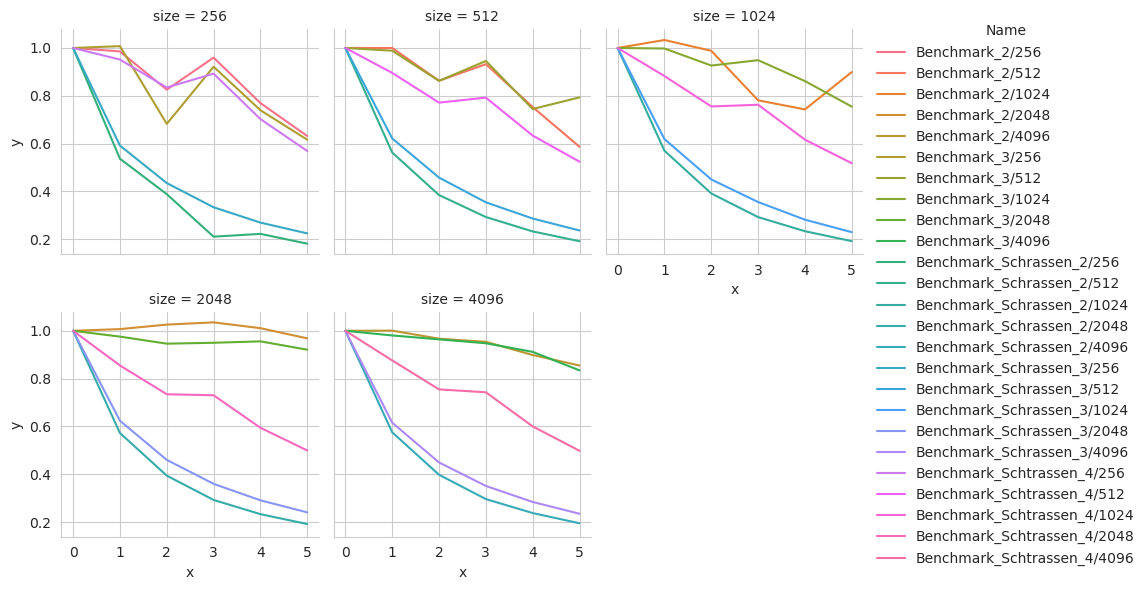

In [29]:
num_lines = len(benchmark["name"]);
num_tests = int(num_lines / num_threads)

titles = []

x = []
y = []
hue = []
size = []

for i in range(num_tests):

    name = benchmark["name"][i * num_threads].split("/")

    titles.append(name[0] + '/' + name[2])

    y_max = benchmark["real_time"][i * num_threads + 0]

    for j in range(num_threads):
        y.append(benchmark["real_time"][(i * num_threads + j) + 0])

        hue.append(titles[-1])
        size.append(name[2])

        y[-1] = y_max / y[-1] / (j + 1)

        x.append(j)

data = list(zip(x, y, hue, size))
dataFrame = pd.DataFrame(data, columns=["x", "y", "Name", "size"])

print(dataFrame)


sns.set_style("whitegrid")
g = sns.FacetGrid(data=dataFrame, col="size", col_wrap=3, hue="Name")
g.map(sns.lineplot, "x", "y")
# g.map(plt.grid)
g.add_legend()

